In [91]:
import os
from time import time
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

import joblib

In [92]:
import plotly.io as pio
pio.renderers.default = 'jupyterlab'

In [93]:
data_final = joblib.load('data_final.joblib')

In [289]:
print(data_final.order_approved_at.max())
print(data_final.order_approved_at.min())
print(data_final.Recency.max())
print(data_final.Recency.min())

2018-08-29 15:10:26
2016-10-04 09:43:32
694
0


4.626666666666667

# Clustering avec K-means pour 3 features RFM

In [100]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler
data_final_clustering = data_final[['Recency' ,'Frequency','Monetary']]
scaler = MinMaxScaler()
data_cluster_RFM = scaler.fit_transform(data_final_clustering)


In [101]:
data_cluster_RFM

array([[1.59942363e-01, 8.86210564e-03, 5.31635336e-04],
       [1.62824207e-01, 1.04572847e-02, 2.21413926e-04],
       [7.72334294e-01, 1.29386742e-02, 5.72751610e-04],
       ...,
       [8.17002882e-01, 9.03934775e-03, 3.50621049e-04],
       [1.70028818e-01, 6.02623183e-03, 3.02938376e-04],
       [6.94524496e-01, 1.59517901e-03, 4.74270980e-05]])

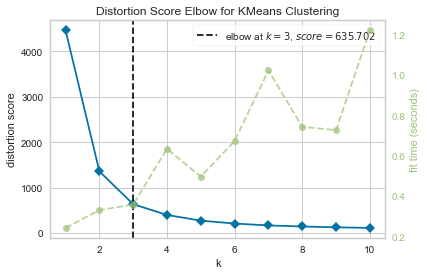

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [390]:
#Elbow Method pour déterminer K
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(data_cluster_RFM)
visualizer.poof() 

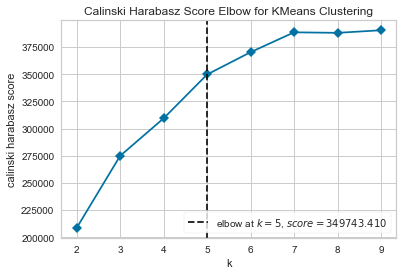

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [444]:
model_ch = KMeans()
visualizer_ch = KElbowVisualizer(model_ch, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer_ch.fit(data_cluster_RFM)    # Fit the data to the visualizer
visualizer_ch.poof()

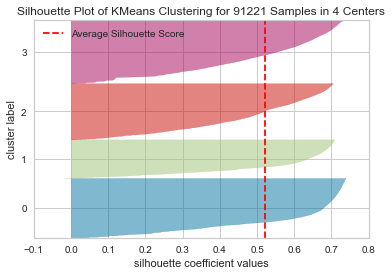

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [311]:
# Best K in Elbow
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_cluster_RFM)        # Fit the data to the visualizer
visualizer.show() 

In [312]:
visualizer.silhouette_score_

0.5226773427626263

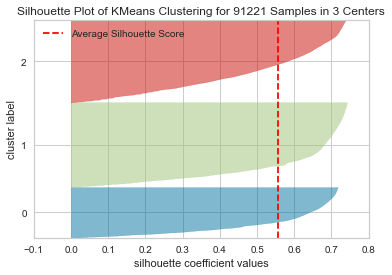

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
# Best K in Elbow

visualizer2 = SilhouetteVisualizer(KMeans(3), colors='yellowbrick')

visualizer2.fit(data_cluster_RFM)        # Fit the data to the visualizer
visualizer2.show() 

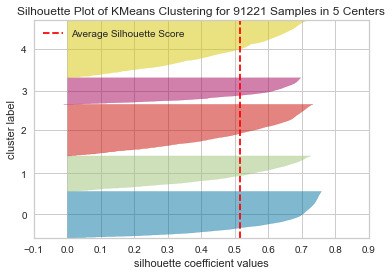

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [436]:

visualizer3 = SilhouetteVisualizer(KMeans(5), colors='yellowbrick')

visualizer3.fit(data_cluster_RFM)        # Fit the data to the visualizer
visualizer3.show() 

In [309]:
visualizer2.silhouette_score_

0.5555857815286732

In [267]:
kmeans_model = KMeans(3)

In [268]:
# k-means fit
y_clusters = kmeans_model.fit_predict(data_cluster_RFM)

In [269]:
kmeans_labels = kmeans_model.labels_

In [407]:

metrics.calinski_harabasz_score(data_cluster_RFM, kmeans_model.labels_)

274883.50385293545

In [445]:
kmeans_model2 = KMeans(4).fit(data_cluster_RFM)
kmeans_labels2 = kmeans_model2.labels_
metrics.calinski_harabasz_score(data_cluster_RFM, kmeans_model2.labels_)

309401.6684410727

In [275]:
# Number of points in each cluster
from collections import Counter
Counter(y_clusters)

Counter({0: 35645, 2: 21261, 1: 34315})

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:ylabel='count'>

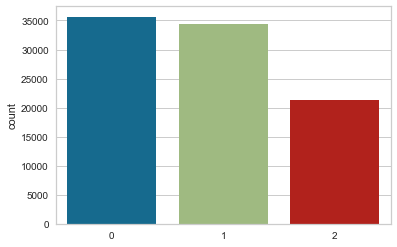

In [262]:
sns.countplot(y_clusters)

### Visualisation des clusters (plot 3D )

In [ ]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Recency'),yaxis = dict(title  = 'Frequency'),zaxis = dict(title  = 'Monetary'))
trace = go.Scatter3d(x=data_cluster_RFM[:, 0], y=data_cluster_RFM[:, 1], z=data_cluster_RFM[:, 2], mode='markers', marker=dict(color = kmeans_labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

#### Interpréter et analyser les différents clusters. Les cluster sont separés essentiellement par valeur de recence, c'est à dire par la date du dernier achat :
 - cluster 0 (bleu) : les clients qui ont effectué des achats récemment (mai 2018 - sep 2018)
 - cluster 1 (rouge) : les clients qui ont effectué des achats il y a quelques mois (oct 2017 - mai 2018)
 - cluster 2 (jaune) : les clients qui ont effectué des achats il y a longtemps (oct 2016 - oct 2017)



In [276]:
dataframe_cluster = pd.DataFrame(data_cluster_RFM)
dataframe_cluster.columns = ['Recency', 'Frequency', 'Monetary']
dataframe_cluster

,Recency,Frequency,Monetary
0,0.159942,0.008862,0.000532
1,0.162824,0.010457,0.000221
2,0.772334,0.012939,0.000573
3,0.461095,0.004786,0.000078
4,0.413545,0.017901,0.001489
...,...,...,...
91216,0.642651,0.002304,0.003294
91217,0.376081,0.009571,0.000345
91218,0.817003,0.009039,0.000351
91219,0.170029,0.006026,0.000303


In [277]:
# K-means labels
kmeans_labels = pd.DataFrame(kmeans_labels)
dataframe_cluster['kmeans_labels'] = kmeans_labels 
dataframe_cluster

,Recency,Frequency,Monetary,kmeans_labels
0,0.159942,0.008862,0.000532,0
1,0.162824,0.010457,0.000221,0
2,0.772334,0.012939,0.000573,2
3,0.461095,0.004786,0.000078,1
4,0.413545,0.017901,0.001489,1
...,...,...,...,...
91216,0.642651,0.002304,0.003294,2
91217,0.376081,0.009571,0.000345,1
91218,0.817003,0.009039,0.000351,2
91219,0.170029,0.006026,0.000303,0


In [ ]:
#kmeans_clusters_means = dataframe_cluster.groupby('kmeans_labels').mean().reset_index()
#kmeans_clusters_means

# Clustering avec DBSCAN pour 3 features RFM

In [117]:
from sklearn.cluster import DBSCAN
data_cluster_sample = data_final_clustering.sample(30000)
scaler_sample = MinMaxScaler()
data_cluster_RFM_sample = scaler_sample.fit_transform(data_cluster_sample)

In [355]:

#from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
#nbrs = NearestNeighbors(n_neighbors=5).fit(data_cluster_RFM_sample)
# Find the k-neighbors of a point
#neigh_dist, neigh_ind = nbrs.kneighbors(data_cluster_RFM_sample)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
#sort_neigh_dist = np.sort(neigh_dist, axis=0)

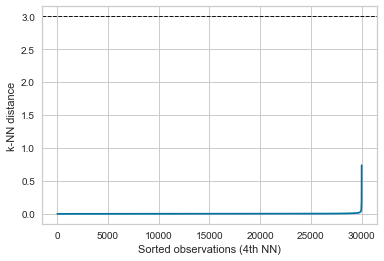

In [356]:
#k_dist = sort_neigh_dist[:, 4]
#plt.plot(k_dist)
#plt.axhline(y=3, linewidth=1, linestyle='dashed', color='k')
#plt.ylabel("k-NN distance")
#plt.xlabel("Sorted observations (4th NN)")
#plt.show()

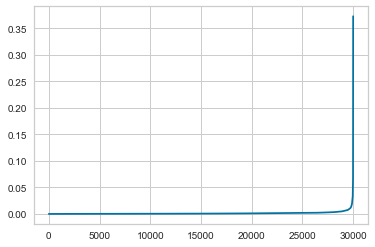

In [336]:

%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
# nous allons choisir un ε de tel sorte que 90% (27000) des observations aient une distance au proche voisin inférieure à ε. 
# Dans notre exemple 0.2 semble convenir.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_cluster_RFM_sample)
distances, indices = nbrs.kneighbors(data_cluster_RFM_sample)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [347]:
clusters = DBSCAN(eps=0.02, min_samples=5).fit(data_cluster_RFM_sample)

In [348]:
# get cluster labels
labels = clusters.labels_

In [406]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_cluster_RFM_sample, clusters.labels_))

Silhouette Coefficient: -0.097


In [405]:
metrics.calinski_harabasz_score(data_cluster_RFM_sample, clusters.labels_)

260.7128332572692

In [349]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [350]:
# check unique clusters
set(labels)

# -1 value represents noisy points could not assigned to any cluster

{-1, 0, 1, 2}

In [351]:
from collections import Counter
Counter(labels)

Counter({0: 29756, -1: 163, 1: 78, 2: 3})

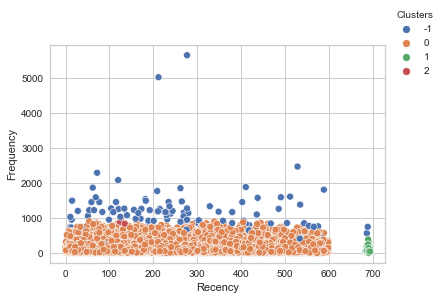

In [342]:

p = sns.scatterplot(data=data_cluster_sample, x="Recency", y="Frequency", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

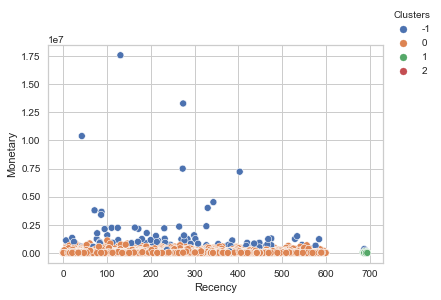

In [352]:
p = sns.scatterplot(data=data_cluster_sample, x="Recency", y="Monetary", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

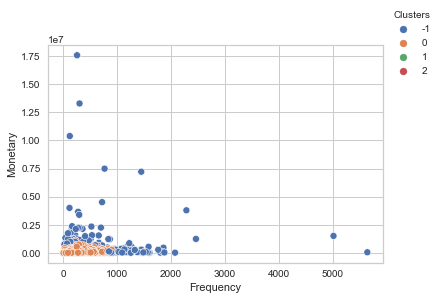

In [357]:
p = sns.scatterplot(data=data_cluster_sample, x="Frequency", y="Monetary", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

# Clustering avec agglomerative clustering pour 3 features RFM

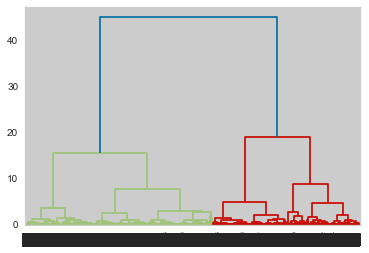

In [313]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(data_cluster_RFM_sample, method='ward'))


In [314]:
model_ac_3feauture = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_ac_3feauture.fit(data_cluster_RFM_sample)

AgglomerativeClustering()

In [315]:
labels_ac_3feature = model_ac_3feauture.labels_

In [316]:
set(labels_ac_3feature)
Counter(labels_ac_3feature)

Counter({1: 16814, 0: 13186})

In [317]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_cluster_RFM_sample, model_ac_3feauture.labels_))

Silhouette Coefficient: 0.584


In [404]:
metrics.calinski_harabasz_score(data_cluster_RFM_sample, model_ac_3feauture.labels_)

67917.5236689148

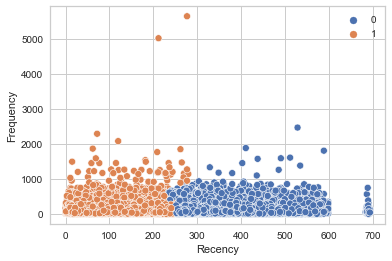

In [318]:
p_AC1 = sns.scatterplot(data=data_cluster_sample, x="Recency", y="Frequency", hue=model_ac_3feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

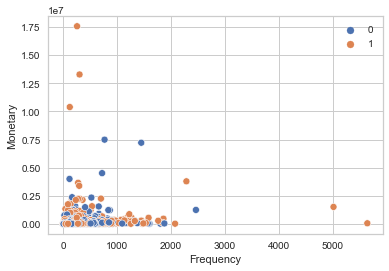

In [326]:
p_AC2 = sns.scatterplot(data=data_cluster_sample, x="Frequency", y="Monetary", hue=model_ac_3feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

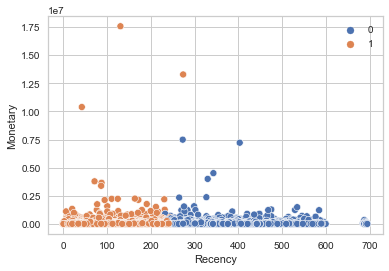

In [327]:
p_AC3 = sns.scatterplot(data=data_cluster_sample, x="Recency", y="Monetary", hue=model_ac_3feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

# Clustering avec K-means pour tous les features numériques

In [150]:
# normalisation
data_final_clustering2 = data_final[['Recency' ,'Frequency','Monetary', 'review_score_mean', 'harvesine_distance_mean']]
scaler2 = MinMaxScaler()
data_cluster_all_feature = scaler2.fit_transform(data_final_clustering2)

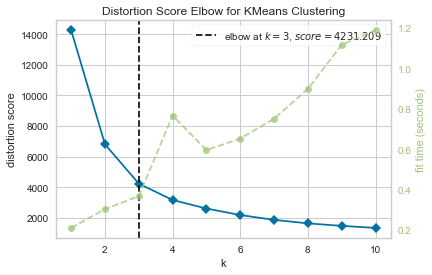

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [152]:
#Elbow Method pour déterminer K
model_allfeature = KMeans()
visualizer = KElbowVisualizer(model_allfeature, k=(1,11))

visualizer.fit(data_cluster_all_feature)
visualizer.poof() 

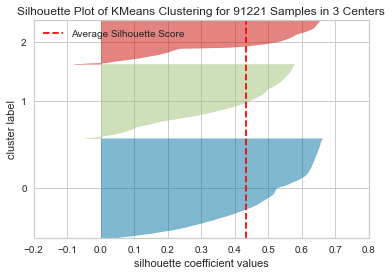

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [153]:
# Best K in Elbow
visualizer_allfeature = SilhouetteVisualizer(KMeans(3), colors='yellowbrick')
visualizer_allfeature.fit(data_cluster_all_feature)        # Fit the data to the visualizer
visualizer_allfeature.show() 

In [305]:
visualizer_allfeature.silhouette_score_

0.4331955578827902

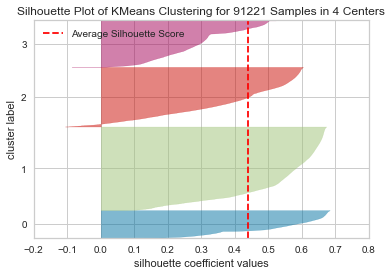

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [154]:
# Best K in Elbow

visualizer_allfeature2 = SilhouetteVisualizer(KMeans(4), colors='yellowbrick')

visualizer_allfeature2.fit(data_cluster_all_feature)        # Fit the data to the visualizer
visualizer_allfeature2.show() 

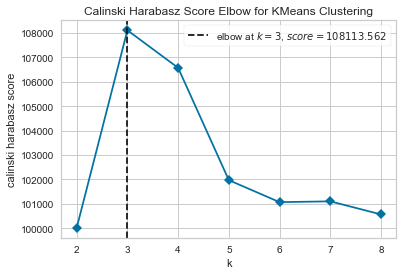

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [439]:
model_ch_5feature = KMeans()
visualizer_ch = KElbowVisualizer(model_ch_5feature, k=(2,9), metric='calinski_harabasz', timings=False)

visualizer_ch.fit(data_cluster_all_feature)    # Fit the data to the visualizer
visualizer_ch.show()

In [297]:
visualizer_allfeature2.silhouette_score_

0.4387535601548762

In [408]:
# 
kmeans_model_5 = KMeans(3).fit(data_cluster_all_feature)


In [411]:
kmeans_model_5.labels_

array([0, 0, 2, ..., 2, 0, 2], dtype=int32)

In [413]:
metrics.calinski_harabasz_score(data_cluster_all_feature, kmeans_model_5.labels_)

108113.51762513643

In [442]:
kmeans_model_5 = KMeans(4).fit(data_cluster_all_feature)
kmeans_model_5.labels_
metrics.calinski_harabasz_score(data_cluster_all_feature, kmeans_model_5.labels_)

106573.85843084798

# Clustering avec DBSCAN pour tous les features numériques (non)

In [189]:

data_cluster_sample_allfeature = data_final_clustering2.sample(30000)
scaler_sample = MinMaxScaler()
data_cluster_allfeature_sample = scaler_sample.fit_transform(data_cluster_sample_allfeature)

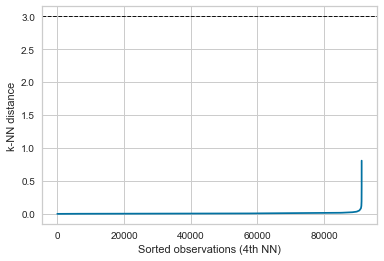

In [190]:
#from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
#nbrs = NearestNeighbors(n_neighbors=5).fit(data_cluster_all_feature)
# Find the k-neighbors of a point
#neigh_dist, neigh_ind = nbrs.kneighbors(data_cluster_all_feature)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
#sort_neigh_dist = np.sort(neigh_dist, axis=0)
#k_dist = sort_neigh_dist[:, 4]
#plt.plot(k_dist)
#plt.axhline(y=3, linewidth=1, linestyle='dashed', color='k')
#plt.ylabel("k-NN distance")
#plt.xlabel("Sorted observations (4th NN)")
#plt.show()


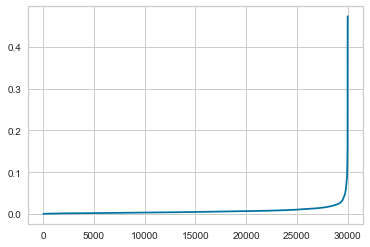

In [358]:

%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
# nous allons choisir un ε de tel sorte que 90% (27000) des observations aient une distance au proche voisin inférieure à ε. 
# Dans notre exemple 0.2 semble convenir.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_cluster_allfeature_sample)
distances, indices = nbrs.kneighbors(data_cluster_allfeature_sample)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [367]:
clusters_all_feature = DBSCAN(eps=0.1, min_samples=5).fit(data_cluster_allfeature_sample)

In [368]:
labels_all_feature = clusters_all_feature.labels_
set(labels_all_feature )

{-1, 0, 1, 2, 3, 4}

In [369]:

Counter(labels_all_feature)

Counter({0: 27028, 1: 2820, -1: 78, 2: 15, 3: 49, 4: 10})

In [414]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_cluster_allfeature_sample, clusters_all_feature.labels_))

Silhouette Coefficient: 0.319


In [415]:
metrics.calinski_harabasz_score(data_cluster_allfeature_sample, clusters_all_feature.labels_)

4408.203059126722

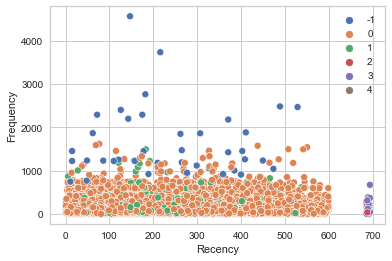

In [370]:
p_all_feature1 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Recency", y="Frequency", hue=clusters_all_feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

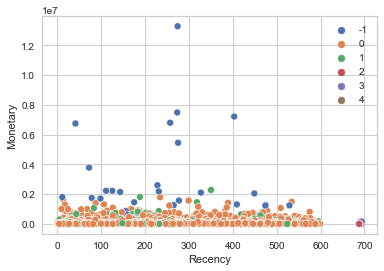

In [371]:
p_all_feature2 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Recency", y="Monetary", hue=clusters_all_feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

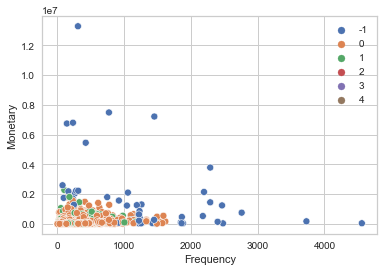

In [372]:
p_all_feature3 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Frequency", y="Monetary", hue=clusters_all_feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

# Clustering avec agglomerative clustering pour tous les features numériques

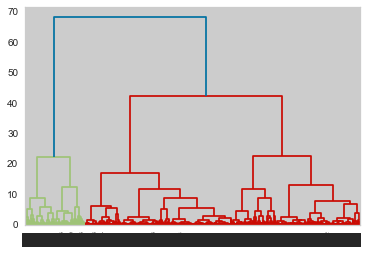

In [319]:
dendrogram_5feature = sch.dendrogram(sch.linkage(data_cluster_allfeature_sample, method='ward'))

In [320]:
model_ac_5feauture = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model_ac_5feauture.fit(data_cluster_allfeature_sample)


AgglomerativeClustering()

In [321]:

from itertools import count
model_ac_5feauture.labels_
Counter(model_ac_5feauture.labels_)

Counter({0: 24554, 1: 5446})

In [416]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_cluster_allfeature_sample, model_ac_5feauture.labels_))

metrics.calinski_harabasz_score(data_cluster_allfeature_sample, model_ac_5feauture.labels_)

Silhouette Coefficient: 0.536


29375.102592062445

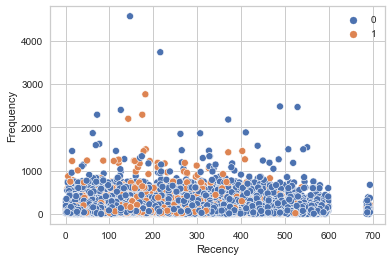

In [323]:
p_all_feature1_agglo1 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Recency", y="Frequency", hue=model_ac_5feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

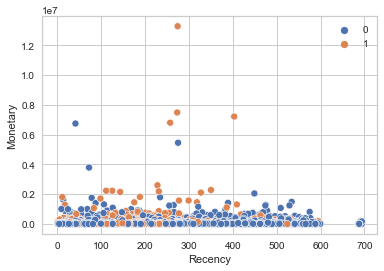

In [324]:
p_all_feature1_agglo2 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Recency", y="Monetary", hue=model_ac_5feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

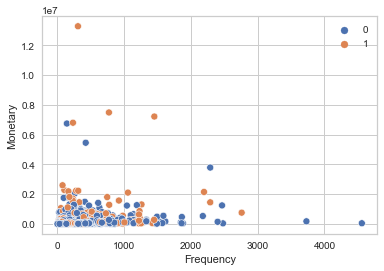

In [325]:
p_all_feature1_agglo3 = sns.scatterplot(data=data_cluster_sample_allfeature, x="Frequency", y="Monetary", hue=model_ac_5feauture.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

# Clustering avec K-means pour 4 features

In [170]:
# normalisation
data_final_clustering3 = data_final[['Recency' ,'Frequency','Monetary', 'review_score_mean']]
scaler3 = MinMaxScaler()
data_cluster_4_feature = scaler3.fit_transform(data_final_clustering3)

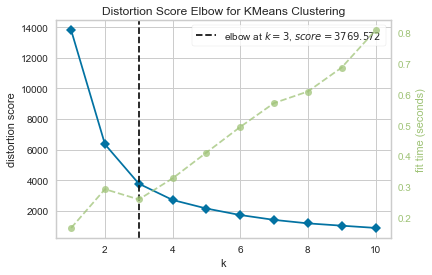

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [182]:
model_4feature = KMeans()
visualizer = KElbowVisualizer(model_4feature, k=(1,11))

visualizer.fit(data_cluster_4_feature)
visualizer.poof() 

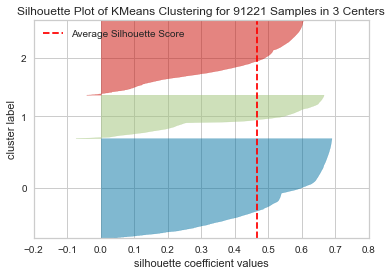

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [175]:
# Best K in Elbow

visualizer_4feature = SilhouetteVisualizer(KMeans(3), colors='yellowbrick')

visualizer_4feature.fit(data_cluster_4_feature)        # Fit the data to the visualizer
visualizer_4feature.show() 

In [306]:
visualizer_4feature.silhouette_score_


0.4666820105297395

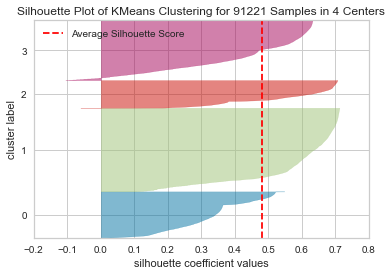

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91221 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [173]:
visualizer_4feature2 = SilhouetteVisualizer(KMeans(4), colors='yellowbrick')

visualizer_4feature2.fit(data_cluster_4_feature)        # Fit the data to the visualizer
visualizer_4feature2.show() 

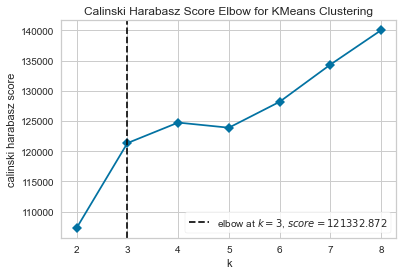

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [440]:
model_ch_4feature = KMeans()
visualizer_ch = KElbowVisualizer(model_ch_4feature, k=(2,9), metric='calinski_harabasz', timings=False)

visualizer_ch.fit(data_cluster_4_feature)    # Fit the data to the visualizer
visualizer_ch.show()

In [307]:
visualizer_4feature2.silhouette_score_

0.48187385659157933

In [431]:
kmeans_model_4 = KMeans(4).fit(data_cluster_4_feature)
kmeans_model_4.labels_
metrics.calinski_harabasz_score(data_cluster_4_feature, kmeans_model_4.labels_)

124727.5891912168

In [441]:
kmeans_model_4 = KMeans(3).fit(data_cluster_4_feature)
kmeans_model_4.labels_
metrics.calinski_harabasz_score(data_cluster_4_feature, kmeans_model_4.labels_)

121332.87771903221

# Clustering avec DBSCAN pour 4 features numériques

In [203]:

data_cluster_sample_4feature = data_final_clustering3.sample(30000)
scaler_4 = MinMaxScaler()
data_dbscan_4feature = scaler_4.fit_transform(data_cluster_sample_4feature)

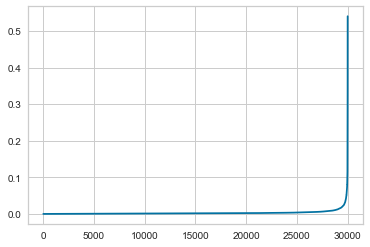

In [373]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
# nous allons choisir un ε de tel sorte que 90% (27000) des observations aient une distance au proche voisin inférieure à ε. 
# Dans notre exemple 0.2 semble convenir.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan_4feature)
distances, indices = nbrs.kneighbors(data_dbscan_4feature)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

In [423]:
clusters_dbscan_4feature = DBSCAN(eps=0.07, min_samples=5).fit(data_dbscan_4feature )

In [424]:
clusters_dbscan_4feature.labels_
Counter(clusters_dbscan_4feature.labels_)

Counter({0: 23505,
         1: 2429,
         2: 2908,
         3: 964,
         4: 39,
         5: 15,
         -1: 110,
         6: 11,
         7: 11,
         8: 8})

In [425]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_dbscan_4feature, clusters_dbscan_4feature.labels_))

Silhouette Coefficient: 0.265


In [426]:
metrics.calinski_harabasz_score(data_dbscan_4feature, clusters_dbscan_4feature.labels_)

5526.4694428827615

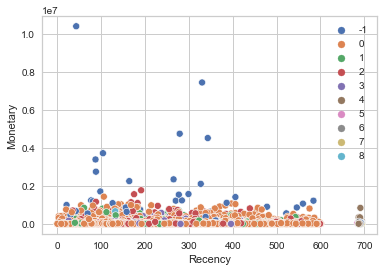

In [427]:
p_4feature1_dbscan = sns.scatterplot(data=data_cluster_sample_4feature, x="Recency", y="Monetary", hue=clusters_dbscan_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

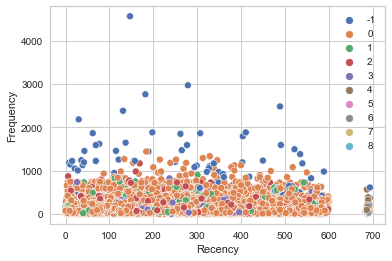

In [428]:
p_4feature1_dbscan = sns.scatterplot(data=data_cluster_sample_4feature, x="Recency", y="Frequency", hue=clusters_dbscan_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

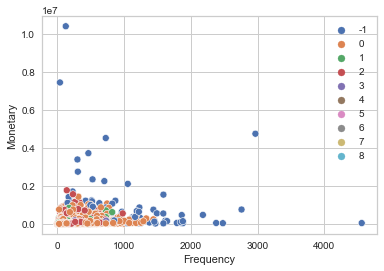

In [429]:
p_4feature1_dbscan = sns.scatterplot(data=data_cluster_sample_4feature, x="Frequency", y="Monetary", hue=clusters_dbscan_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

# Clustering avec agglomerative clustering pour 4 features 

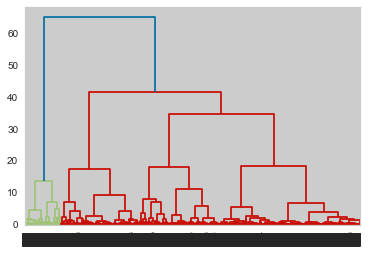

In [328]:
dendrogram_4feature = sch.dendrogram(sch.linkage(data_dbscan_4feature, method='ward'))

In [329]:
clusters_agglo_4feature = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters_agglo_4feature.fit(data_dbscan_4feature)

AgglomerativeClustering()

In [330]:
clusters_agglo_4feature.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [331]:
Counter(clusters_agglo_4feature.labels_)

Counter({0: 26765, 1: 3235})

In [332]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_dbscan_4feature, clusters_agglo_4feature.labels_))

Silhouette Coefficient: 0.582


In [420]:
metrics.calinski_harabasz_score(data_dbscan_4feature, clusters_agglo_4feature.labels_)

25633.704365561134

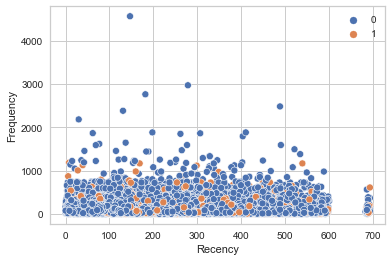

In [333]:
p_4_feature1_agglo1 = sns.scatterplot(data=data_cluster_sample_4feature, x="Recency", y="Frequency", hue=clusters_agglo_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

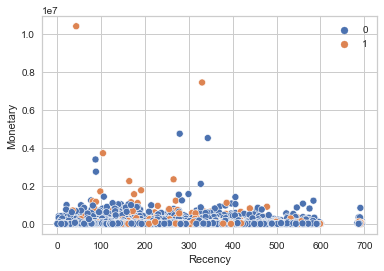

In [334]:
p_4_feature1_agglo2 = sns.scatterplot(data=data_cluster_sample_4feature, x="Recency", y="Monetary", hue=clusters_agglo_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

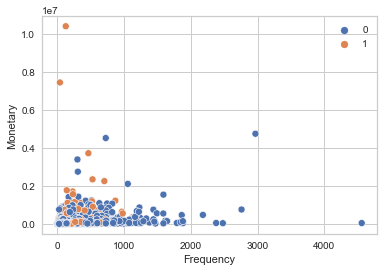

In [335]:
p_4_feature1_agglo3 = sns.scatterplot(data=data_cluster_sample_4feature, x="Frequency", y="Monetary", hue=clusters_agglo_4feature.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2))
plt.show()

## Clustering K-prototypes avec tous les features (numérique et catégories)

In [176]:
# normalisation
data_final_N_Feature = data_final[['Recency' ,'Frequency','Monetary', 'review_score_mean', 'harvesine_distance_mean']]
scaler = MinMaxScaler()
data_cluster_N_Feature = scaler.fit_transform(data_final_N_Feature)

In [177]:
data_cluster_N_Feature = pd.DataFrame(data_cluster_N_Feature, columns=['Recency' ,'Frequency','Monetary', 'review_score_mean', 'harvesine_distance_mean'])

In [178]:
data_final_C_Feature = data_final['cate_list']
data_final_N_C = pd.concat([data_cluster_N_Feature, data_final_C_Feature], axis=1, join='inner')


In [179]:
data_final_N_C

,Recency,Frequency,Monetary,review_score_mean,harvesine_distance_mean,cate_list
0,0.159942,0.008862,0.000532,1.00,0.039573,bed_bath_table
1,0.162824,0.010457,0.000221,0.75,0.038065,health_beauty
2,0.772334,0.012939,0.000573,0.50,0.028286,stationery
3,0.461095,0.004786,0.000078,0.75,0.312143,telephony
4,0.413545,0.017901,0.001489,1.00,0.032788,telephony
...,...,...,...,...,...,...
91216,0.642651,0.002304,0.003294,1.00,0.270773,health_beauty
91217,0.376081,0.009571,0.000345,0.75,0.212379,baby
91218,0.817003,0.009039,0.000351,1.00,0.191534,auto
91219,0.170029,0.006026,0.000303,1.00,0.106186,watches_gifts


In [183]:
# Get the position of categorical columns
catColumnsPos = [data_final_N_C.columns.get_loc(col) for col in list(data_final_N_C.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(data_final_N_C.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['cate_list']
Categorical columns position  : [5]


In [184]:
# Convert dataframe to matrix
dfMatrix = data_final_N_C.to_numpy()
dfMatrix

array([[0.15994236311239193, 0.008862105636299184, 0.0005316353364021322,
        1.0, 0.03957290694011239, 'bed_bath_table'],
       [0.1628242074927954, 0.010457284650833037, 0.00022141392599953896,
        0.75, 0.03806468647818416, 'health_beauty'],
       [0.7723342939481268, 0.01293867422899681, 0.0005727516096020003,
        0.5, 0.028285759909699275, 'stationery'],
       ...,
       [0.8170028818443803, 0.009039347749025168, 0.0003506210489434554,
        1.0, 0.19153355043704529, 'auto'],
       [0.17002881844380402, 0.006026231832683445, 0.0003029383758815601,
        1.0, 0.10618649023418986, 'watches_gifts'],
       [0.6945244956772334, 0.0015951790145338532, 4.742709803259145e-05,
        1.0, 0.001671888524879956, 'perfumery']], dtype=object)

In [185]:
# Choose optimal K using Elbow method
from plotnine import *
import plotnine
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [186]:
cost

[28518.57138364242,
 20972.28727732736,
 17995.041731005625,
 16649.221939619343,
 15797.47954237587,
 15272.37946634042,
 14732.55432163386,
 14376.584446118524,
 13734.68514856597]

   Cluster          Cost
0        1  28518.571384
1        2  20972.287277
2        3  17995.041731
3        4  16649.221940
4        5  15797.479542
5        6  15272.379466
6        7  14732.554322
7        8  14376.584446
8        9  13734.685149


<AxesSubplot:xlabel='Cluster', ylabel='Cost'>

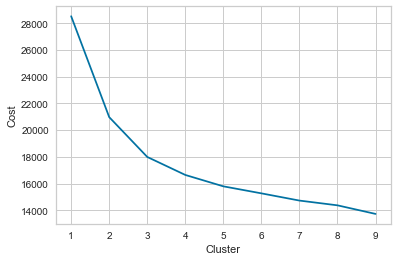

In [187]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
print(df_cost)
# Data viz
sns.lineplot(
    data=df_cost, x="Cluster", y="Cost",  markers=True)

### Clustering K-prototypes n'est pas interessant car on a 71 type de catégorie de produit (clustering difficile)